# Word2Vec

Voy a utilizar word2vec para ver palabras similiares que me agrupen los Motivos de las encuestas que ya encontré con LDA, y los posibles atributos que describan al problema del cliente.

In [1]:
from collections import defaultdict
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import gensim

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from gensim import corpora, models, similarities, matutils
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import nltk

import pickle
import random
import sys
from tqdm import tqdm
from sklearn import manifold
import time

start_time = time.time()

%matplotlib inline

from playsound import playsound


sys.path.append("../source")


In [2]:
import random
random.seed(100)
random_state = 100

In [3]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from gensim.models.phrases import Phrases, Phraser

In [6]:
path_df = "..\\..\\..\\..\\data_nps\\"
path_data_processed = "..\\..\\..\\..\\data_nps\\processed\\"
sonido = "..\\figures\\sonidos\\"



In [7]:
comments = pd.read_csv(path_data_processed +"comments.csv")
print(f"Tamaño del Dataset: {comments.shape}")

Tamaño del Dataset: (63752, 40)


In [6]:
comments.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
CREATION_DATE,8/1/2020 10:30:04,8/1/2020 10:30:04,8/1/2020 10:30:04,8/1/2020 10:30:04,8/1/2020 10:30:04
RESPONSE_DATE,8/1/2020 10:42:58,8/1/2020 10:42:25,8/1/2020 10:42:25,8/1/2020 10:43:11,8/1/2020 10:43:37
CURRENT_STATUS,NaN,Closed,Closed,Closed,Closed
ALL_LOG_NOTES_COMBINED,NaN,[2020-01-08 05:43:53] Alert Created: Promoter ...,[2020-01-08 05:43:53] Alert Created: Promoter ...,[2020-01-08 05:43:53] Alert Created: Promoter ...,[2020-01-08 05:43:53] Alert Created: Promoter ...
ALERT_STATUS_CHANGED_TIME,NaN,8/1/2020 05:43:59,8/1/2020 05:43:59,8/1/2020 05:44:00,8/1/2020 05:44:00
TITLE,Estimada,Estimado,Estimado,Estimado,Estimado
DOCUMENT_TYPE,DNI,DNI,DNI,DNI,DNI
DOCUMENT_NUMBER,18085803,23782512,23782512,14398625,23547536
FIRST_NAME,SILVIA ESTELA,PABLO JAVIER,PABLO JAVIER,VICTOR OMAR,JUAN IGNACIO


In [7]:
 comments["token"]

0         ['atencion', 'bueno', 'inquietud', 'satisfecha']
1                         ['fenomeno', 'empleado', 'luca']
2                         ['fenomeno', 'empleado', 'luca']
3                                    ['servicio', 'bueno']
4                             ['bueno', 'servicio', 'web']
                               ...                        
94498                                                   []
94499    ['conductor', 'camion', 'aca', 'bueno', 'profe...
94500    ['bueno', 'atencion', 'respuesta', 'mejor', 't...
94501    ['bueno', 'atencion', 'respuesta', 'mejor', 't...
94502    ['agil', 'rapidez', 'contratar', 'via', 'onlin...
Name: token, Length: 94503, dtype: object

In [8]:
word_list = comments.token.tolist()

In [9]:
print("el corpus tiene",len(word_list), "oraciones y",sum([len(x) for x in word_list]),"palabras")

el corpus tiene 94503 oraciones y 8594736 palabras


In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        #vuelve todo a lower case y saca puntuaciones y convierte cada documento de texto en una lista de palabras
        yield(gensim.utils.simple_preprocess(str(sentence), deacc =True))

In [11]:
train_w = list(sent_to_words(word_list))

In [12]:
collocations = Phrases(sentences=train_w, min_count=10,threshold=0.5,scoring='npmi') # threshold: minimo score aceptado

In [13]:
to_collocations = Phraser(collocations)

In [14]:
df_collocations =pd.DataFrame([x for x in collocations.export_phrases(train_w)],columns=["bigram","score"])
df_collocations.shape

(43900, 2)

In [15]:
df_collocations.drop_duplicates().sort_values(by="score",ascending=False).head(50)

,bigram,score
9097,b'sentar precedente',1.000000
3366,b'ssi eera',1.000000
3360,b'ccon autoss',1.000000
10443,b'oersona chateamos',1.000000
725,b'fitz roy',1.000000
9689,b'montes oca',1.000000
3359,b'venddo loss',0.992783
65,b'call center',0.990229
4137,b'bahia blanca',0.989098
2677,b'pareja otas',0.983828


In [16]:
trainset_ngrams = to_collocations[train_w]

In [17]:
trainset_ngrams

# Embeddings

In [18]:
bigram_reloaded = trainset_ngrams

In [19]:
w2v_model = Word2Vec(bigram_reloaded, workers=4,size=20, min_count = 10, window = 10, sample = 1e-3,negative=5,sg=1)
#w2v_model.save("word2vec_20dim")  # save model
#w2v_model = Word2Vec.load("word2vec_20dim")  # load model

In [20]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [21]:
from sklearn.decomposition import PCA


ipykernel_launcher:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


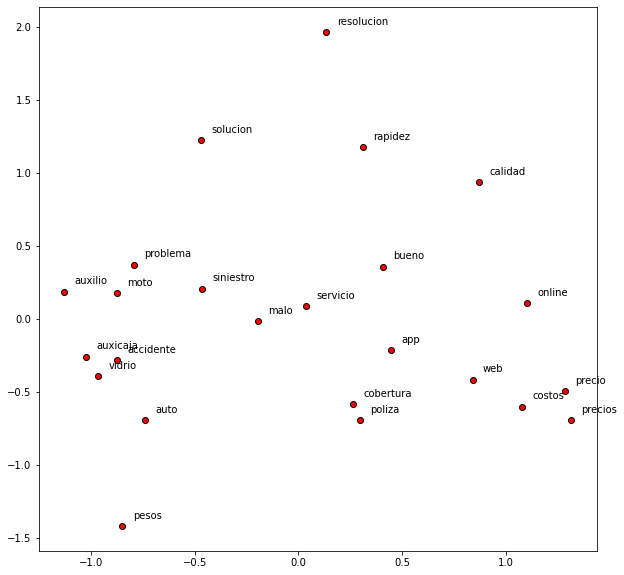

In [22]:
display_pca_scatterplot(w2v_model, 
                        ['auxilio','auxicaja','problema','malo','bueno','calidad','rapidez','costos','precios','precio','siniestro','poliza','auto','servicio','solucion','resolucion','cobertura','accidente','moto','vidrio','pesos','online','app','web'])


In [33]:
w2v_model.most_similar(positive=["precio"], topn=300)

ipykernel_launcher:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('competitivo', 0.9012373685836792),
 ('comparacion', 0.8919674754142761),
 ('producto', 0.8727626800537109),
 ('comparacion_companias', 0.8649700880050659),
 ('altisimo', 0.8583831191062927),
 ('competencia', 0.8535158038139343),
 ('contratarlo', 0.8468548059463501),
 ('elevado', 0.8375986218452454),
 ('conveniente', 0.8370376229286194),
 ('accesible', 0.8344224691390991),
 ('prestacion', 0.8247602581977844),
 ('precios', 0.8217341899871826),
 ('alternativas', 0.8185077905654907),
 ('caro', 0.816935122013092),
 ('plaza', 0.8154098987579346),
 ('comparacion_aseguradoras', 0.8150722980499268),
 ('modelos', 0.8148285746574402),
 ('similares', 0.8147509098052979),
 ('recien_comienzo', 0.8141658902168274),
 ('sigue_siendo', 0.8133347630500793),
 ('comparando', 0.8130705952644348),
 ('relacion', 0.8123407959938049),
 ('ofrecian', 0.8118913769721985),
 ('aseguradores', 0.8117468953132629),
 ('comparados', 0.8112908601760864),
 ('prestaciones', 0.8040165901184082),
 ('publicidad', 0.80336499

In [24]:
w2v_model.most_similar(positive=["rapidez"], topn=100)

ipykernel_launcher:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('efectividad', 0.9348183870315552),
 ('inmediatez', 0.91660076379776),
 ('bueno_atencion', 0.9161282777786255),
 ('eficiencia', 0.9143977761268616),
 ('concretos', 0.8924588561058044),
 ('velocidad', 0.8883137106895447),
 ('expedita', 0.8829439282417297),
 ('rapida', 0.8807209134101868),
 ('fluidez', 0.8795385956764221),
 ('expeditivos', 0.8793954849243164),
 ('contingencias', 0.8747685551643372),
 ('cordialidad', 0.8727600574493408),
 ('predispuestos', 0.8724091649055481),
 ('diligente', 0.8695416450500488),
 ('personal_capacitado', 0.8604222536087036),
 ('facilmente', 0.8600809574127197),
 ('inmediata', 0.8577884435653687),
 ('expeditivo', 0.8560537099838257),
 ('conceptos', 0.8556907773017883),
 ('todas_inquietudes', 0.8530957698822021),
 ('resolutivo', 0.8529496192932129),
 ('agilidad', 0.8517212867736816),
 ('ayuda_mecanica', 0.8515243530273438),
 ('concisa', 0.851313591003418),
 ('incoveniente', 0.8502148389816284),
 ('optima', 0.8493373394012451),
 ('temas_planteados', 0.84797

In [25]:
w2v_model.most_similar(positive=["servicio"], topn=100)

ipykernel_launcher:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('prestado', 0.9165259599685669),
 ('bueno', 0.8880087733268738),
 ('contenta', 0.8836733102798462),
 ('ayuda_mecanica', 0.8710210919380188),
 ('prestacion', 0.8698071241378784),
 ('servico', 0.8650215864181519),
 ('conforme', 0.864281177520752),
 ('criticar', 0.8618476390838623),
 ('costos_altos', 0.852437436580658),
 ('prestan', 0.8439739346504211),
 ('super', 0.8438732624053955),
 ('noches', 0.8419962525367737),
 ('acudieron', 0.8357417583465576),
 ('objetar', 0.8302978873252869),
 ('mayormente', 0.8293139338493347),
 ('evaluarlo', 0.8286398649215698),
 ('basandome', 0.8222157955169678),
 ('puedo_calificar', 0.8217051029205322),
 ('impecable', 0.8160404562950134),
 ('contento', 0.8144596219062805),
 ('confiables', 0.8106147646903992),
 ('tencion', 0.8105611801147461),
 ('sorprendio', 0.808027982711792),
 ('automovil_club', 0.8075493574142456),
 ('razonable', 0.8031797409057617),
 ('muchachos', 0.8031323552131653),
 ('expeditivo', 0.8021406531333923),
 ('resolutivo', 0.8017825484275

In [26]:
w2v_model.most_similar(positive=["vehiculos"], topn=100)

ipykernel_launcher:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('rosenzweig', 0.9071964025497437),
 ('estan_tomando', 0.8923296332359314),
 ('autos_asegurados', 0.8361954092979431),
 ('aseguraba', 0.8352402448654175),
 ('hugo', 0.8322993516921997),
 ('asesor_esteban', 0.8276175260543823),
 ('flia', 0.8245783448219299),
 ('asegurado', 0.8221535086631775),
 ('cuotas_mensuales', 0.8197014331817627),
 ('miembros', 0.8122093677520752),
 ('todas_cias', 0.80661940574646),
 ('sabido', 0.8060217499732971),
 ('automotores', 0.8054699897766113),
 ('rodados', 0.800528347492218),
 ('debitar_automaticamente', 0.7989738583564758),
 ('realiza_bonificacion', 0.7980716228485107),
 ('vehiculos_asegurados', 0.7961913347244263),
 ('aseguro', 0.7949447631835938),
 ('pelo', 0.7921536564826965),
 ('robo_incendio', 0.7866000533103943),
 ('grupo_familiar', 0.7820295095443726),
 ('recientemente_acaban', 0.7793675661087036),
 ('telefono_site', 0.774985134601593),
 ('seguros', 0.7715854644775391),
 ('camara', 0.7675954699516296),
 ('vivienda', 0.7664028406143188),
 ('mujer',

In [27]:
w2v_model.most_similar(positive=["facilidad"], topn=100)

ipykernel_launcher:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('practicidad', 0.9234914779663086),
 ('comodidad', 0.9172290563583374),
 ('facil_acceso', 0.8997317552566528),
 ('agilidad', 0.894538164138794),
 ('simplicidad', 0.8830984234809875),
 ('simples', 0.8746888041496277),
 ('engorrosos', 0.8659772276878357),
 ('guiaron', 0.85566246509552),
 ('simpleza', 0.8532565236091614),
 ('sitio_web', 0.850557804107666),
 ('online', 0.8484944701194763),
 ('sencilla', 0.8450707197189331),
 ('eventualidades', 0.8445125222206116),
 ('facilidad_contratacion', 0.8419281244277954),
 ('plataforma', 0.8356698751449585),
 ('practicos', 0.8313271999359131),
 ('agiliza', 0.83017897605896),
 ('expedita', 0.8274357318878174),
 ('intervenir', 0.8263900279998779),
 ('cuestiones_administrativas', 0.8254454135894775),
 ('post', 0.8247517347335815),
 ('sencillo', 0.8239224553108215),
 ('variedad', 0.8237342834472656),
 ('imnediatamente', 0.8223690390586853),
 ('requeridos', 0.8216421008110046),
 ('conciso', 0.8215794563293457),
 ('adecuado', 0.8201008439064026),
 ('pre

In [28]:
print("--- %s segundos---" % (time.time() - start_time))
playsound(sonido+"war.mp3")
import gc 
gc.collect()

--- 67.82314896583557 segundos---


4014